**Clustering of a simple dataset using Kmeans**

<u>Goal:</u>

The main goal is to learn how to use Kmeans with scikit-learn library"

<u>To do:</u>

Complete the source code whenever you find <font color='red'>#?</font>

This case study concerns simple employee data.

This data does not require preprocessing.

The goal is to :
- From a population of employees, apply Kmeans to find its clusters.
- Given a new employee, predict the label of the cluster to which he belongs.

**1. Training dataset**

The training dataset is a <font color='red'>data table</font> where :
- Rows are employees
- Columns are their two numerical caracteristics : age and salary

In python, the easiest way to create a numerical data table is as a <font color='red'>numpy matrix</font>.

In [1]:
# Import numpy module and give it np as alias
import numpy as np

In [2]:
# The data of employees is :
# [[1200,25],
# [1300,27],
# [1100,27],
# [2500,49],
# [2400,47],
# [2600,45]]

# Create a numpy matrix called X using np.array() function
# You pass as argument the list of lists of employees above
X = np.array([[1200,25],[1300,27],[1100,27],[2500,49],[2400,47],[2600,45]])
X

array([[1200,   25],
       [1300,   27],
       [1100,   27],
       [2500,   49],
       [2400,   47],
       [2600,   45]])

**2. Learning process using Kmeans**

scikit-learn package implements most of the machine learning algorithms.
In particular, <font color='red'>Kmeans</font> is implemented as <font color='red'>KMeans class</font> in <font color='red'>sklearn.cluster</font> module.

KMeans class has :
- a <font color='red'>constructor function</font> that allows to initialize hyperparameters
- a <font color='red'>fit()</font> function that allows to fit the model given the training data
- a <font color='red'>predict()</font> function that allows to predict the cluster label for a given new data

In [4]:
# Import KMeans class
from sklearn.cluster import KMeans

In [5]:
# Create a KMeans instance denoted km from KMeans class
# Initialize the hyperparameters :
# - n_clusters : it is the main hyperparameter of Kmeans and it represents the number of clusters
#   => In our case, the initial number of clusters = 2
# - random_state : this is an optional hyperparameter 
#   => It makes the random choice of initial cluster center values more deterministic
#   => We can give any value, for example random_state=0
km = KMeans(n_clusters=2,random_state=0)

In [6]:
# Call km.fit() function and pass the training data matrix X as an argument
km.fit(X)

c:\Users\Benal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

**3. Show the clusters**

Once the learning process is completed, we can determine the clusters

In [10]:
# Show the centers of clusters using cluster_centers_ attribute of km
km.cluster_centers_

array([[2500.        ,   47.        ],
       [1200.        ,   26.33333333]])

In [11]:
# Predict the labels of clusters for the training data employees
# Call km.predict() and pass the training data matrix X as argument
labels=km.predict(X)
labels

array([1, 1, 1, 0, 0, 0])

In [12]:
# Show the clusters of training dataset
cluster0=X[labels==0]
cluster1=X[labels==1]

In [13]:
# cluster 0
cluster0

array([[2500,   49],
       [2400,   47],
       [2600,   45]])

In [14]:
# cluster 1
cluster1

array([[1200,   25],
       [1300,   27],
       [1100,   27]])

**4. Prediction process**

Once the learning process is completed, we can predict the cluster label for a new employee

In [17]:
# Let emp_new be a new employee with age 24 and salary 500.67
# We must create it as a numpy matrix of shape 1x2 : [[500.67,24]]
emp_new = np.array([[500.67,24]])
emp_new

array([[500.67,  24.  ]])

In [18]:
# Predict the cluster label to which emp_new belongs
label=km.predict(emp_new)
label


array([1])

**5. Visualization of clusters**

We can visualize the population and the obtained clusters using matplotlib library.

In [19]:
#  Import matplotlib.pyplot module and give it plt as alias
import matplotlib.pyplot as plt

At first, we try to visualize the population data points in a figure

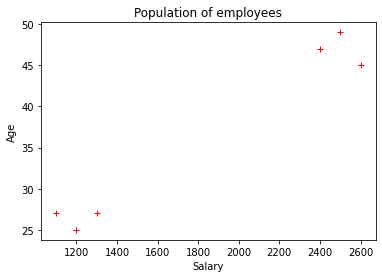

In [25]:
# We want each employee to be represented by a dot colored red
# We use the plt.plot() function
# It takes as arguments:
# - the first column of X as x coordinate
# - the second column of X as y coordinate
# - 'r+': the letter r designates the red color of the point and + designates the symbol of the point
plt.plot(X[:,0],X[:,1],"r+")

# We can give a labels for x-axis and y-axis
plt.xlabel('Salary')
plt.ylabel('Age')
# We can give a title for the figure
plt.title('Population of employees')
plt.show()

Now, copy-paste the code above and update it to visualize rather the clusters in the same figure

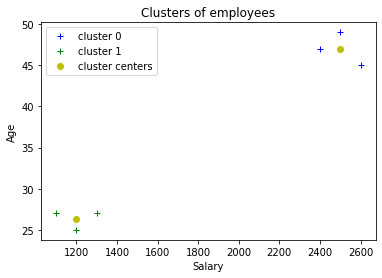

In [34]:
# Show the clusters using plt.plot()
# The points of the first cluster cluster0 are colored in blue
# The points of the first cluster cluster0 are colored in green
# For each cluster associate a legend label
plt.plot(cluster0[:,0],cluster0[:,1],"b+" ,label='cluster 0')
plt.plot(cluster1[:,0],cluster1[:,1],"g+" ,label='cluster 1')
# Show the cluster centers with yellow color and o symbol 
plt.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],"yo", label='cluster centers')

# To enable the legend, call plt.legend()
plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend()
plt.title('Clusters of employees')
plt.show()